In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.utils import normalize

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import MAPE
from tensorflow.keras.callbacks import EarlyStopping

#---Import moduls from stock-prediction package
from stock_prediction.data_prep import Data_Prep
from stock_prediction.features_exo import exo_selection

# Test 1: LSTM
learning rate, momentum

## Data exploration

In [2]:
def load_preproc_data(company='vinci'):
    """This function allows to load the data for chosen company,
    to select features make changes directly inside this function."""
    #---(1) Instantiate the Class 
    prep_class = Data_Prep(company, 252)



    #---(2) Load the first dataframe ready to use if no more modification
    df = prep_class.data_prep()



    #---(3) Function that allows us to delete some of the features we don't want to use for modelling 
    # Log Return is to False by default
    # *******************
    # if period < 252 , don't use Annual_vol
    #********************
    prep_class.select_features(df, Return = True, Log_Return=False, High_Low=True, High_Close=True, Low_Close=True,
                            Volume_Change=True, Period_Volum=True, Annual_Vol=True,
                            Period_Vol=True, Return_Index=True, Volum_Index=True, Relative_Return=True)

    #---(4) Function that add the exogenous features that you need to select 
    # returns the dataframe ready to modelling 
    # and the list of the columns to rebase it later - no VIX because no rebase for VIX - kept unchanged 
    df = exo_selection(df, sp500=True, gold=True, eurusd=True, nasdaq=True, crude=True, vix=True)

    #---(5) Sort values to make sure they are ordered *in case and drop data column
    df = df.sort_values('Date')
    df = df.drop(columns='Date')

    #---Company code on stock market
    idx = df.columns[0][7:]
    
    return df, idx

In [3]:
data, idx = load_preproc_data('vinci')

In [84]:
data

,Return_DG.PA,High-Low_DG.PA,High-Close_DG.PA,Low-Close_DG.PA,Volume-Change_DG.PA,Period_Volum_DG.PA,Annual_Vol_DG.PA,Period_Vol_DG.PA,Return_stoxx_50,Period_Volum_stoxx_50,DG.PA_relatif,Return_S&P500,Return_Gold,Return_Usd,Return_Nasdaq,Return_Crude,Vix_No_Rebase
0,0.015547,0.022332,0.007076,0.015150,0.963615,0.331698,0.202937,0.202937,-0.001862,0.000000,0.017409,-0.007514,0.007844,0.003832,-0.000753,-0.026983,0.1041
1,-0.002187,0.012279,0.009799,0.002456,-0.407210,-0.209472,0.202602,0.202602,0.003497,0.000000,-0.005684,-0.003694,-0.003931,0.006431,0.007794,0.000828,0.0989
2,0.006833,0.009021,0.002689,0.006314,-0.156808,-0.332583,0.202592,0.202592,0.006953,-0.186563,-0.000119,0.001219,0.007735,-0.002468,0.009440,-0.014475,0.0975
3,-0.003713,0.009155,0.005913,0.003224,-0.368494,-0.577419,0.201847,0.201847,0.000000,0.000000,-0.003713,0.002787,0.001958,0.005799,-0.001605,-0.005455,0.1007
4,-0.013239,0.009780,0.008727,0.001043,0.957079,-0.171234,0.201653,0.201653,-0.010479,-0.215993,-0.002760,-0.001566,0.011803,-0.002128,-0.003275,0.016667,0.1045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,-0.005139,0.016498,0.014529,0.001941,0.069404,-0.453011,0.333450,0.333450,-0.007640,-0.538190,0.002501,0.000000,0.000000,-0.000256,0.000000,0.000000,0.1676
1023,0.011192,0.010714,0.004044,0.006642,0.222716,-0.329363,0.333514,0.333514,0.007994,-0.340290,0.003199,-0.001445,0.000210,0.003511,-0.000892,0.021110,0.1790
1024,-0.000958,0.011579,0.005113,0.006433,-0.185038,-0.451458,0.332512,0.332512,0.004114,-0.369720,-0.005072,0.003642,0.002417,-0.001234,0.001445,0.016391,0.1748
1025,-0.004474,0.016505,0.008347,0.008091,-0.026295,-0.464856,0.332046,0.332046,-0.002265,-0.384844,-0.002209,-0.008757,-0.019030,-0.000647,-0.010309,-0.000291,0.1804


In [4]:
idx

'DG.PA'

In [5]:
data.shape

(1027, 17)

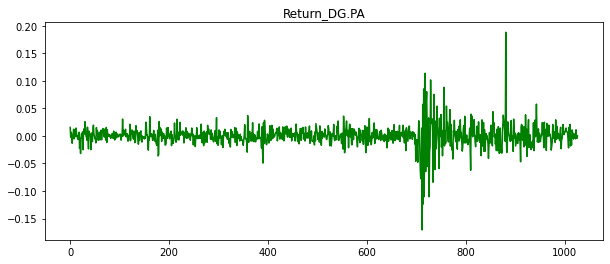

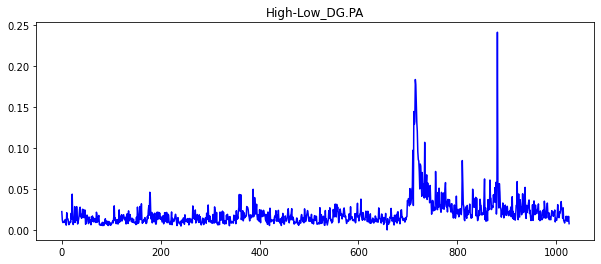

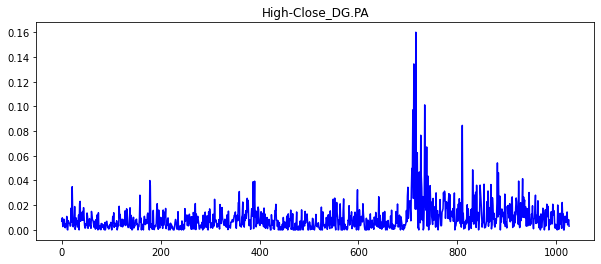

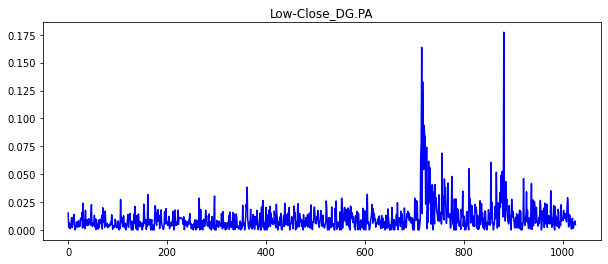

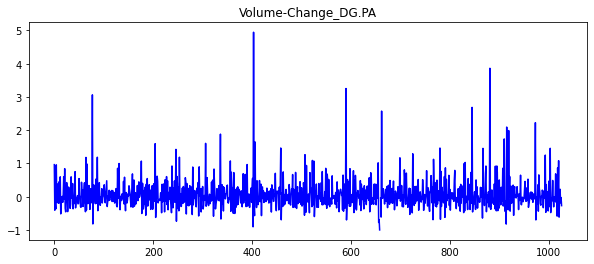

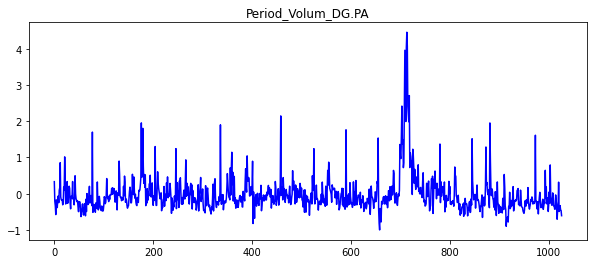

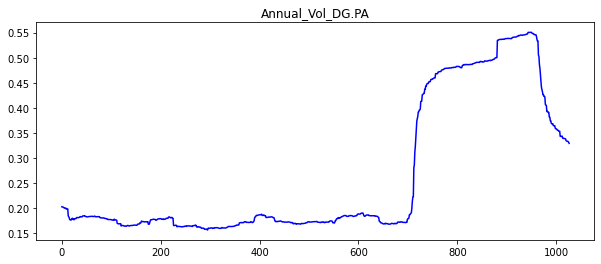

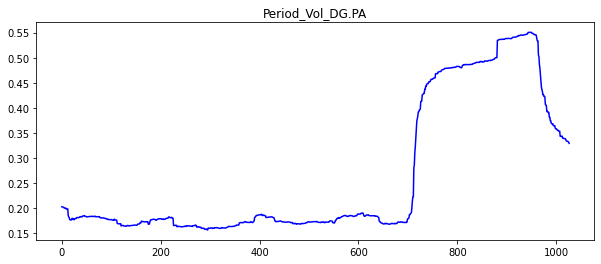

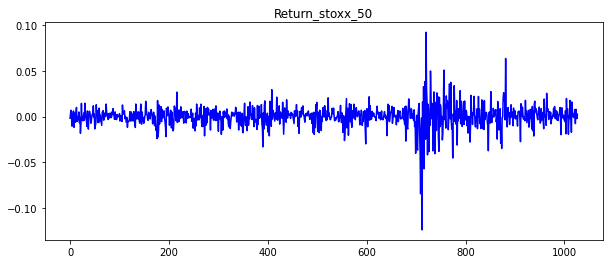

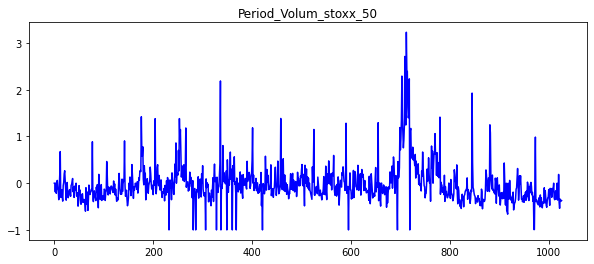

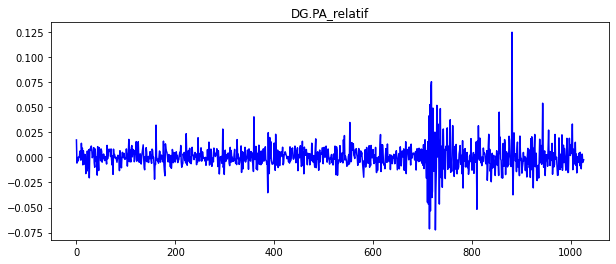

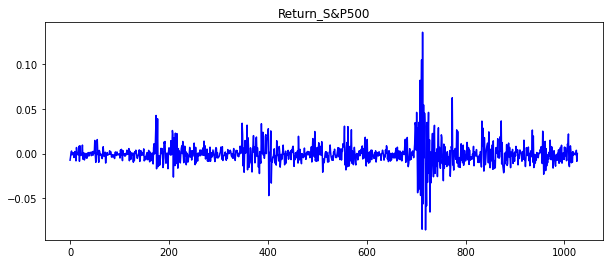

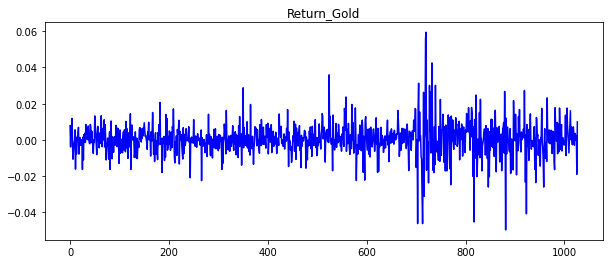

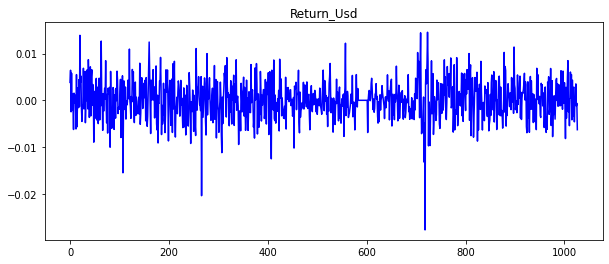

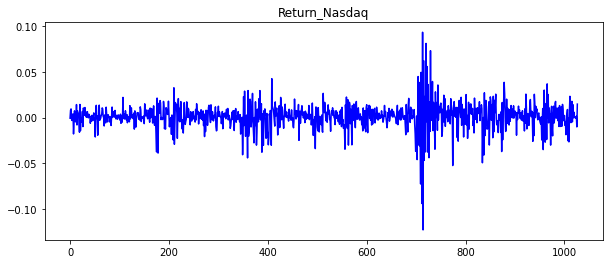

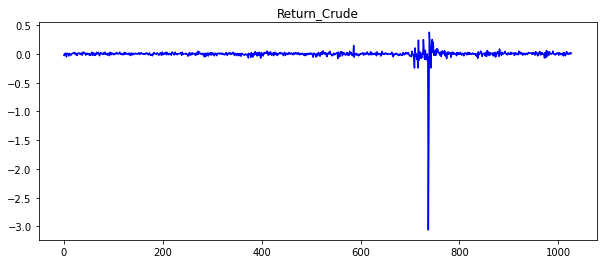

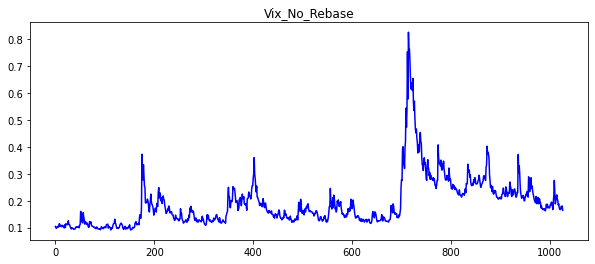

In [6]:
#---Plot the temporal progression of different features of our Data

%matplotlib inline

for col in data.columns:
    color="green" if col == f"Return_{idx}" else "blue"
    data[col].plot(figsize=(10,4), color=color)
    plt.title(col)

    plt.show()

## Data preprocessing TS oriented

In [7]:
data.head()

,Return_DG.PA,High-Low_DG.PA,High-Close_DG.PA,Low-Close_DG.PA,Volume-Change_DG.PA,Period_Volum_DG.PA,Annual_Vol_DG.PA,Period_Vol_DG.PA,Return_stoxx_50,Period_Volum_stoxx_50,DG.PA_relatif,Return_S&P500,Return_Gold,Return_Usd,Return_Nasdaq,Return_Crude,Vix_No_Rebase
0,0.015547,0.022332,0.007076,0.015150,0.963615,0.331698,0.202937,0.202937,-0.001862,0.000000,0.017409,-0.007514,0.007844,0.003832,-0.000753,-0.026983,0.1041
1,-0.002187,0.012279,0.009799,0.002456,-0.407210,-0.209472,0.202602,0.202602,0.003497,0.000000,-0.005684,-0.003694,-0.003931,0.006431,0.007794,0.000828,0.0989
2,0.006833,0.009021,0.002689,0.006314,-0.156808,-0.332583,0.202592,0.202592,0.006953,-0.186563,-0.000119,0.001219,0.007735,-0.002468,0.009440,-0.014475,0.0975
3,-0.003713,0.009155,0.005913,0.003224,-0.368494,-0.577419,0.201847,0.201847,0.000000,0.000000,-0.003713,0.002787,0.001958,0.005799,-0.001605,-0.005455,0.1007
4,-0.013239,0.009780,0.008727,0.001043,0.957079,-0.171234,0.201653,0.201653,-0.010479,-0.215993,-0.002760,-0.001566,0.011803,-0.002128,-0.003275,0.016667,0.1045


**K-fold Vinci**

<AxesSubplot:>

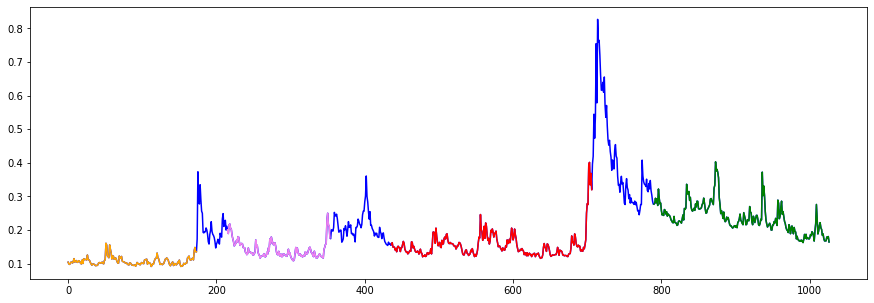

In [8]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_kfold, idx = load_preproc_data('vinci')

#---Fold_1
data_kfold_1_stop = int(0.17*data.shape[0])
data_kfold_1 = data[:data_kfold_1_stop].copy()

#---Fold_2
data_kfold_2_start = int(0.21*data.shape[0])
data_kfold_2_stop = int(0.345*data.shape[0])
data_kfold_2 = data[data_kfold_2_start:data_kfold_2_stop].copy()

#---Fold_3
data_kfold_3_start = int(0.425*data.shape[0])
data_kfold_3_stop = int(0.6885*data.shape[0])
data_kfold_3 = data[data_kfold_3_start:data_kfold_3_stop].copy()

#---Fold_4
data_kfold_4_start = int(0.77*data.shape[0])
data_kfold_4 = data[data_kfold_4_start:].copy()


#---Plot sample
%matplotlib inline
data_kfold['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')
data_kfold_1['Vix_No_Rebase'].plot(figsize=(15,5), color='orange')
data_kfold_2['Vix_No_Rebase'].plot(figsize=(15,5), color='violet')
data_kfold_3['Vix_No_Rebase'].plot(figsize=(15,5), color='red')
data_kfold_4['Vix_No_Rebase'].plot(figsize=(15,5), color='green')

**K-fold Airbus**

<AxesSubplot:>

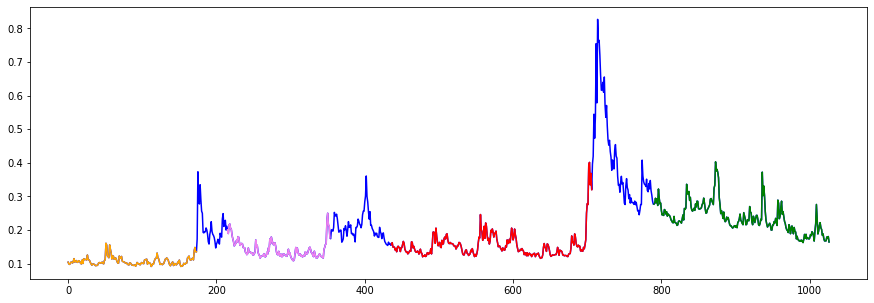

In [85]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_kfold, idx = load_preproc_data('bnp')

#---Fold_1
data_kfold_1_stop = int(0.17*data.shape[0])
data_kfold_1 = data[:data_kfold_1_stop].copy()

#---Fold_2
data_kfold_2_start = int(0.21*data.shape[0])
data_kfold_2_stop = int(0.345*data.shape[0])
data_kfold_2 = data[data_kfold_2_start:data_kfold_2_stop].copy()

#---Fold_3
data_kfold_3_start = int(0.425*data.shape[0])
data_kfold_3_stop = int(0.6885*data.shape[0])
data_kfold_3 = data[data_kfold_3_start:data_kfold_3_stop].copy()

#---Fold_4
data_kfold_4_start = int(0.77*data.shape[0])
data_kfold_4 = data[data_kfold_4_start:].copy()


#---Plot sample
%matplotlib inline
data_kfold['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')
data_kfold_1['Vix_No_Rebase'].plot(figsize=(15,5), color='orange')
data_kfold_2['Vix_No_Rebase'].plot(figsize=(15,5), color='violet')
data_kfold_3['Vix_No_Rebase'].plot(figsize=(15,5), color='red')
data_kfold_4['Vix_No_Rebase'].plot(figsize=(15,5), color='green')

In [92]:
data, idx = load_preproc_data()

In [20]:
def k_fold_split(fold, horizon=1, threshold=0.8):
    
    # gap = 0 here
    gap = horizon - 1

    # set a train: 80%, val: 20% sizes
    train_size = int(threshold*df.shape[0])

    fold_train = df[:train]
    fold_val = df[train+gap:val]
    
    return fold_train, fold_val

In [21]:
# To avoid data leakage we have to split sets chronologically.

def train_test_val_split(df, horizon=1, train_threshold=0.6, val_threshold=0.8):
    
    # here gap=0, if we take a longer horizon it'll matter
    gap = horizon - 1

    # set a train: 60%, test: 20%, val: 20% sizes
    train = int( train_threshold*df.shape[0])
    val = int(val_threshold*df.shape[0])


    df_train = df[:train]
    df_val = df[train:val]
    df_test = df[val+gap:] # gap can matter later
    
    return df_train, df_val, df_test

In [112]:
def subsample_sequence(df, length=10, horizon=1): #, target = 'DG.PA'
    
    """This function is able to get a subsequence X and a corresponding target y
    N days after the last observationexpressed in horizon variable."""
    
    last_possible = df.shape[0] - length - horizon
    #random seed  = 0
    np.random.seed(42) 
    random_start = np.random.randint(0, last_possible) 
    
    X = df[random_start: random_start+length].values # drop(columns=[f'Return_{target}']).
    
    # target: Close price to predict
    y = df.iloc[random_start+length+horizon][f'Return_{idx}'] # [f'Return_{target}']; taregt = 'Return'

    return X, y

In [117]:
def shift_sequences(df, length=10, horizon=1):
    last_possible = df.shape[0] - length - horizon
    X=[]
    y=[]
    for start in range(last_possible):
        X.append(df[start: start+length].values)
        y.append(df.iloc[start+length+horizon][f'Return_{idx}'])
    return np.array(X), np.array(y)

In [118]:
X, y = shift_sequences(data)

In [120]:
X.shape

(1016, 10, 17)

In [99]:
def get_X_y(df, length=10, horizon=1, number_of_sequences=100):
    
    """This function returns a given number of X and y sequences of given length."""
    
    X, y = [], []

    for _ in range(int(number_of_sequences)):
        
        xi, yi = subsample_sequence(df, length, horizon)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)

    return X, y

## Model RNN

In [106]:
#---Pipeline
def train_model(df,
                train_threshold=0.6,
                val_threshold=0.8,
                nb_sequences = 100,
                len_ = 20,
                l_rate = 0.001,
                momentum = 0.9,
                loss = 'MAPE',
                metric = MAPE,
                patience = 30,
                batch_size = 16,
                horizon=1,
                plot_history=False,
                verbose = 0):
    
    """Train model function:
    Allows to split sequences and gets X and y for train, val, test sets;
    Initializes stacked RNN model with Normalization, LSTM and 2 fully connected layers.
    Returns: X_train, y_train, X_test, y_test, model"""
    

    #---Split train, test, val sets
    df_train, df_val, df_test = train_test_val_split(df, train_threshold=train_threshold, val_threshold=val_threshold)
    
    #---Get train, test, val X and y sequences
    X_train, y_train = get_X_y(df_train, length=len_, number_of_sequences=nb_sequences)
    X_val, y_val = get_X_y(df_val, length=len_, number_of_sequences=nb_sequences) #round(nb_sequences*0.2)
    X_test, y_test = get_X_y(df_test, length=len_, number_of_sequences=nb_sequences) #round(nb_sequences*0.2)
    
    normalizer = Normalization()
    normalizer.adapt(X_train) # , axis=-1, order=1 as minmax

    
    #---Initialize the model
    model = Sequential()
    model.add(normalizer)
#     model.add(layers.BatchNormalization(input_shape=(len_,17)))
    model.add(layers.LSTM(50, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(30, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(20, return_sequences=False, activation='tanh'))
    
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    
    model.compile(loss=loss, 
                  optimizer=RMSprop(learning_rate=l_rate, momentum=momentum), 
                  metrics=[metric])


    es = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=1000, 
            batch_size=batch_size,
            callbacks=[es],
            verbose=verbose)

    
    if plot_history:
        
        plot_loss(history, patience)
        
#     res = model.evaluate(X_test, y_test, verbose=0)
#     return res[1]
    return X_train, y_train, X_test, y_test, model

In [15]:
#---Plot train val losses function

def plot_loss(history, patience):
    plt.plot(history.history['loss']) # plot train loss
    plt.plot(history.history['val_loss']) # plot val loss
    plt.title('Loss & Metric')
    plt.ylabel('Mean Absolute Percentage Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
#     plt.plot(history.history['mean_absolute_percentage_error'])
#     plt.plot(history.history['val_mean_absolute_percentage_error'])
#     plt.title('MAPE')
#     plt.ylabel('Mean Absolute Percentage Error')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='best')
#     plt.show()
    
    stop_epoch = max(history.epoch)-patience
    val_mape = history.history['val_mean_absolute_percentage_error'][stop_epoch]

    print(f"early stopping at {max(history.epoch)} epoch.\nval_mape: {val_mape}")

## Load the data for "Vinci" and make some tests

In [113]:
#---load the data with selected features

data, idx = load_preproc_data('vinci')

In [26]:
data.shape

(1027, 17)

Epoch 1/1000
7/7 - 11s - loss: 1274.7361 - mean_absolute_percentage_error: 1274.7361 - val_loss: 1403.9578 - val_mean_absolute_percentage_error: 1403.9578
Epoch 2/1000
7/7 - 1s - loss: 614.2946 - mean_absolute_percentage_error: 614.2946 - val_loss: 1393.9312 - val_mean_absolute_percentage_error: 1393.9312
Epoch 3/1000
7/7 - 1s - loss: 176.4460 - mean_absolute_percentage_error: 176.4460 - val_loss: 1704.5153 - val_mean_absolute_percentage_error: 1704.5153
Epoch 4/1000
7/7 - 1s - loss: 388.1864 - mean_absolute_percentage_error: 388.1864 - val_loss: 1322.7759 - val_mean_absolute_percentage_error: 1322.7759
Epoch 5/1000
7/7 - 1s - loss: 89.4269 - mean_absolute_percentage_error: 89.4269 - val_loss: 1370.5928 - val_mean_absolute_percentage_error: 1370.5928
Epoch 6/1000
7/7 - 1s - loss: 128.2108 - mean_absolute_percentage_error: 128.2108 - val_loss: 1641.5548 - val_mean_absolute_percentage_error: 1641.5548
Epoch 7/1000
7/7 - 1s - loss: 97.1603 - mean_absolute_percentage_error: 97.1603 - val_l

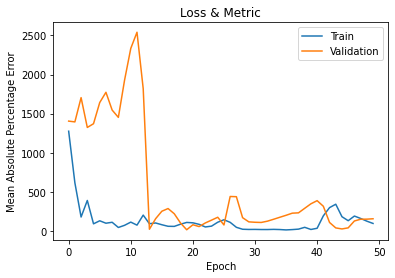

early stopping at 49 epoch.
val_mape: 13.366189956665039


In [114]:
#---train the model
X_train, y_train, X_test, y_test, model = train_model(df = data, plot_history=True, verbose=2)

**! Need to recode the model to be able to check step by step the gradient descent**

**Val_mape is anormally huge. Need to change training period to find out why ?**

In [30]:
X_test.shape

(100, 20, 17)

In [109]:
#---Prediction
res = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

In [34]:
y_pred.shape

(100, 1)

Prediction of stock return on J+1: [[ 2.9165000e-03]
 [-5.4042414e-04]
 [-4.3614209e-04]
 [ 4.7152005e-03]
 [ 1.5438311e-03]
 [-1.6069785e-03]
 [-1.6785264e-03]
 [ 4.5663901e-03]
 [ 8.8674948e-03]
 [-7.1288273e-04]
 [-1.1591613e-04]
 [ 5.7228915e-03]
 [-1.5154742e-03]
 [ 6.2329881e-03]
 [-9.8997727e-04]
 [ 1.4213733e-03]
 [ 5.6365654e-03]
 [-1.0683611e-03]
 [ 5.7228915e-03]
 [ 5.6607351e-03]
 [-8.8333338e-04]
 [ 7.6104216e-03]
 [ 5.6219995e-03]
 [ 3.8727894e-03]
 [ 7.6471977e-03]
 [ 6.1119311e-03]
 [ 6.0533695e-03]
 [ 5.8266856e-03]
 [-1.3542213e-03]
 [ 7.0167072e-03]
 [ 5.6365579e-03]
 [-1.1885874e-03]
 [-1.5301779e-03]
 [ 6.1887987e-03]
 [-1.8801875e-03]
 [ 6.1119311e-03]
 [ 7.0702694e-03]
 [-7.7051297e-04]
 [ 3.7662312e-04]
 [-9.8997727e-04]
 [ 6.7707151e-05]
 [-1.6560443e-03]
 [ 9.7718574e-03]
 [ 3.3605844e-03]
 [ 7.2576627e-03]
 [ 5.1341578e-03]
 [ 5.3732991e-03]
 [-1.1591613e-04]
 [ 2.2413172e-03]
 [ 7.0000775e-03]
 [-1.2790225e-03]
 [ 5.8266856e-03]
 [ 8.8674948e-03]
 [-1.678526

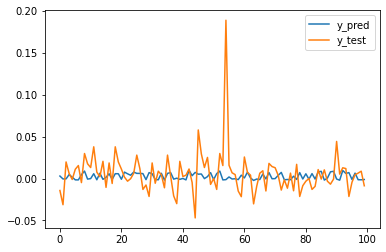

In [110]:
plt.plot(y_pred, label='y_pred') #'.'
plt.plot(y_test,  label='y_test')
plt.legend()

print(f"Prediction of stock return on J+1: {y_pred} with mape {res[1]}")

**y pred_ doesn't vary much, it seems as our model wasn't not trained well !**

**Baseline**

In [13]:
#TODO
# y_pred = last seen value
# bench_res = np.mean(np.abs(y_pred - y_test)/y_test)*100

# print(f'Benchmark MAPE on the test set : {bench_res:.2f} %')

In [37]:
#df_test
df_train, df_val, df_test = train_test_val_split(data) #train_threshold=0.6, val_threshold=0.8 to test !

# X_test & y_test
X_test, y_test = get_X_y(df_test, length=20)

In [38]:
data.head()

,Return_DG.PA,High-Low_DG.PA,High-Close_DG.PA,Low-Close_DG.PA,Volume-Change_DG.PA,Period_Volum_DG.PA,Annual_Vol_DG.PA,Period_Vol_DG.PA,Return_stoxx_50,Period_Volum_stoxx_50,DG.PA_relatif,Return_S&P500,Return_Gold,Return_Usd,Return_Nasdaq,Return_Crude,Vix_No_Rebase
0,0.015547,0.022332,0.007076,0.015150,0.963615,0.331698,0.202937,0.202937,-0.001862,0.000000,0.017409,-0.007514,0.007844,0.003832,-0.000753,-0.026983,0.1041
1,-0.002187,0.012279,0.009799,0.002456,-0.407210,-0.209472,0.202602,0.202602,0.003497,0.000000,-0.005684,-0.003694,-0.003931,0.006431,0.007794,0.000828,0.0989
2,0.006833,0.009021,0.002689,0.006314,-0.156808,-0.332583,0.202592,0.202592,0.006953,-0.186563,-0.000119,0.001219,0.007735,-0.002468,0.009440,-0.014475,0.0975
3,-0.003713,0.009155,0.005913,0.003224,-0.368494,-0.577419,0.201847,0.201847,0.000000,0.000000,-0.003713,0.002787,0.001958,0.005799,-0.001605,-0.005455,0.1007
4,-0.013239,0.009780,0.008727,0.001043,0.957079,-0.171234,0.201653,0.201653,-0.010479,-0.215993,-0.002760,-0.001566,0.011803,-0.002128,-0.003275,0.016667,0.1045


In [39]:
# We predict the last stock return value!
nb_sequences = 100
# y_pred_baseline = np.zeros(nb_sequences)
y_pred_baseline = 0
# bench_res = np.mean(np.abs((y_pred_baseline - y_test)/y_test))*100
bench_res = np.mean(np.abs((y_pred_baseline - np.mean(y_test)/np.mean(y_test)))*100)

print(f"Benchmark MAPE on the test set : {bench_res:.2f} %")

Benchmark MAPE on the test set : 100.00 %


## Let's try to change threshold: (Train+val) = 90%, test = 10%

In [57]:
data_threshold_test, idx = load_preproc_data()

<AxesSubplot:>

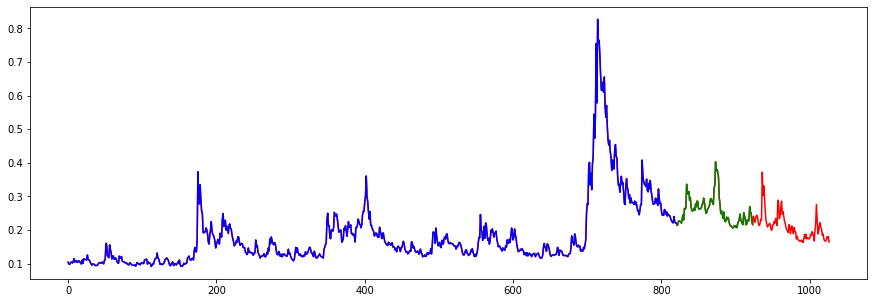

In [62]:
#---Visualization based on 'Vix_no_rebase' (relativité) to train our model on.

train = data_threshold_test[:int(0.8*data_threshold_test.shape[0])].copy()
val = data_threshold_test[int(0.8*data_threshold_test.shape[0]):int(0.9*data_threshold_test.shape[0])].copy()

%matplotlib inline
data_threshold_test['Vix_No_Rebase'].plot(figsize=(15,5), color='red')
train['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')
val['Vix_No_Rebase'].plot(figsize=(15,5), color='green')

Epoch 1/1000
4/4 [==============================] - 11s 707ms/step - loss: 2264.9600 - mean_absolute_percentage_error: 2264.9600 - val_loss: 681.0576 - val_mean_absolute_percentage_error: 681.0576
Epoch 2/1000
4/4 [==============================] - 0s 71ms/step - loss: 1138.5320 - mean_absolute_percentage_error: 1138.5320 - val_loss: 986.7626 - val_mean_absolute_percentage_error: 986.7626
Epoch 3/1000
4/4 [==============================] - 0s 67ms/step - loss: 1556.2002 - mean_absolute_percentage_error: 1556.2002 - val_loss: 726.2380 - val_mean_absolute_percentage_error: 726.2380
Epoch 4/1000
4/4 [==============================] - 0s 71ms/step - loss: 466.6862 - mean_absolute_percentage_error: 466.6862 - val_loss: 750.2947 - val_mean_absolute_percentage_error: 750.2947
Epoch 5/1000
4/4 [==============================] - 0s 74ms/step - loss: 370.9931 - mean_absolute_percentage_error: 370.9931 - val_loss: 967.5229 - val_mean_absolute_percentage_error: 967.5229
Epoch 6/1000
4/4 [=========

4/4 [==============================] - 0s 66ms/step - loss: 269.1417 - mean_absolute_percentage_error: 269.1417 - val_loss: 240.0383 - val_mean_absolute_percentage_error: 240.0383
Epoch 44/1000
4/4 [==============================] - 0s 78ms/step - loss: 422.4593 - mean_absolute_percentage_error: 422.4593 - val_loss: 287.6222 - val_mean_absolute_percentage_error: 287.6222
Epoch 45/1000
4/4 [==============================] - 0s 60ms/step - loss: 529.8599 - mean_absolute_percentage_error: 529.8599 - val_loss: 266.2068 - val_mean_absolute_percentage_error: 266.2068
Epoch 46/1000
4/4 [==============================] - 0s 65ms/step - loss: 233.5946 - mean_absolute_percentage_error: 233.5946 - val_loss: 623.9323 - val_mean_absolute_percentage_error: 623.9323
Epoch 47/1000
4/4 [==============================] - 0s 65ms/step - loss: 190.7875 - mean_absolute_percentage_error: 190.7875 - val_loss: 738.9443 - val_mean_absolute_percentage_error: 738.9443
Epoch 48/1000
4/4 [=========================

4/4 [==============================] - 0s 106ms/step - loss: 231.8367 - mean_absolute_percentage_error: 231.8367 - val_loss: 537.0796 - val_mean_absolute_percentage_error: 537.0796
Epoch 86/1000
4/4 [==============================] - 0s 109ms/step - loss: 287.0212 - mean_absolute_percentage_error: 287.0212 - val_loss: 144.6753 - val_mean_absolute_percentage_error: 144.6753
Epoch 87/1000
4/4 [==============================] - 0s 107ms/step - loss: 215.4694 - mean_absolute_percentage_error: 215.4694 - val_loss: 136.4987 - val_mean_absolute_percentage_error: 136.4987
Epoch 88/1000
4/4 [==============================] - 0s 108ms/step - loss: 112.0274 - mean_absolute_percentage_error: 112.0274 - val_loss: 273.0695 - val_mean_absolute_percentage_error: 273.0695
Epoch 89/1000
4/4 [==============================] - 0s 110ms/step - loss: 175.5239 - mean_absolute_percentage_error: 175.5239 - val_loss: 201.4125 - val_mean_absolute_percentage_error: 201.4125
Epoch 90/1000
4/4 [====================

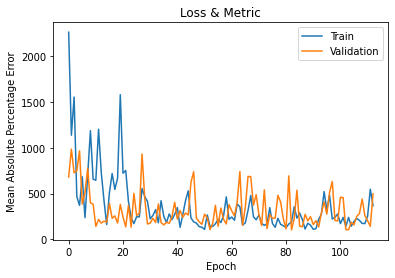

early stopping at 112 epoch.
val_mape: 102.54814147949219


In [58]:
X_train, y_train, X_test, y_test, model_1 = train_model(df = data_threshold_test, train_threshold=0.8, val_threshold=0.9, nb_sequences=50, len_=10, plot_history=True)

Prediction of stock return on J+1: [[-5.10662794e-05]
 [-1.77345052e-03]
 [ 6.36999495e-04]
 [-1.91650540e-03]
 [-4.60959971e-04]
 [-2.10314803e-03]
 [ 3.28388065e-04]
 [-4.62479889e-04]
 [-2.79106200e-03]
 [-1.91650540e-03]
 [ 4.14824113e-04]
 [-6.01373613e-04]
 [ 1.52513385e-04]
 [ 1.58221461e-03]
 [-2.32644379e-04]
 [ 1.67656690e-05]
 [-1.75390765e-03]
 [-1.77345052e-03]
 [-1.21007673e-03]
 [-5.10662794e-05]
 [-7.98035413e-04]
 [-1.61961652e-03]
 [ 2.32594740e-03]
 [-5.61699271e-04]
 [ 1.19600445e-05]
 [ 1.10149775e-02]
 [ 4.14824113e-04]
 [-2.10314803e-03]
 [-3.92680988e-04]
 [-1.01496652e-03]
 [ 1.54551119e-04]
 [ 8.92124139e-04]
 [-1.85084715e-03]
 [ 5.30327018e-03]
 [ 1.10149775e-02]
 [ 3.93158942e-03]
 [ 1.27959345e-03]
 [ 4.94792126e-03]
 [-1.73128583e-03]
 [-8.26969743e-04]
 [ 1.10149775e-02]
 [-1.01496652e-03]
 [ 8.86917114e-05]
 [ 2.20667571e-05]
 [-1.61961652e-03]
 [ 8.92131589e-04]
 [-4.60959971e-04]
 [-1.36593357e-03]
 [-1.21007673e-03]
 [ 6.62336126e-04]] with mape 107.

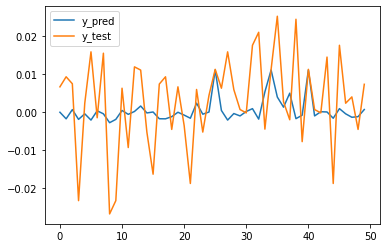

In [59]:
#---Prediction
res = model_1.evaluate(X_test, y_test, verbose=0)
y_pred = model_1.predict(X_test)
plt.plot(y_pred, label='y_pred') #'.'
plt.plot(y_test,  label='y_test')
plt.legend()

print(f"Prediction of stock return on J+1: {y_pred} with mape {res[1]}")

**Let's find the best  nb of sequences and their lenght for initial model to compare!**

In [64]:
#---Test 1: nb_sequences

def test_nb_sequences(df, start=20, stop=100, step=10):
    
    """This function computes MAPE in given range
    to find best nb_sequences"""
    
    nb_sequences_grid = np.arange(start, stop, step)
    MAPE = []

    for nb_sequences in nb_sequences_grid:
            X_train, y_train, X_test, y_test, model = train_model(df=df, nb_sequences=nb_sequences)
            res = model.evaluate(X_test, y_test)
            MAPE.append((nb_sequences, res[1]))
            print(f"For {nb_sequences} sequences the MAPE is of {res[1]:.2f} %")

In [65]:
data_threshold_test, idx = load_preproc_data()
test_nb_sequences(data_threshold_test)

1/1 [==============================] - 0s 67ms/step - loss: 416.5528 - mean_absolute_percentage_error: 416.5528
For 20 sequences the MAPE is of 416.55 %
1/1 [==============================] - 0s 67ms/step - loss: 907.5626 - mean_absolute_percentage_error: 907.5626
For 30 sequences the MAPE is of 907.56 %
2/2 [==============================] - 0s 27ms/step - loss: 135.8471 - mean_absolute_percentage_error: 135.8471
For 40 sequences the MAPE is of 135.85 %
2/2 [==============================] - 0s 35ms/step - loss: 101.6440 - mean_absolute_percentage_error: 101.6440
For 50 sequences the MAPE is of 101.64 %
2/2 [==============================] - 0s 107ms/step - loss: 105.5815 - mean_absolute_percentage_error: 105.5815
For 60 sequences the MAPE is of 105.58 %
3/3 [==============================] - 0s 35ms/step - loss: 6623.8950 - mean_absolute_percentage_error: 6623.8950
For 70 sequences the MAPE is of 6623.90 %
3/3 [==============================] - 3s 40ms/step - loss: 366.2293 - mean_ab

In [69]:
#---Test 2: length of sequence with best number of sequences from previous test = 50

def test_len_sequence(df, start=10, stop=30, step=2):
    
    """This function computes MAPE in given range
    to find best nb_sequences"""
    
    len_grid = np.arange(start, stop, step)
    MAPE = []

    for len_ in len_grid:
            X_train, y_train, X_test, y_test, model = train_model(df, len_=len_, nb_sequences=50)
            res = model.evaluate(X_test, y_test)
            MAPE.append((len_, res[1]))
            print(f"For lenght of sequence {len_} the MAPE is of {res[1]:.2f} %")

In [70]:
data_threshold_test, idx = load_preproc_data()
test_len_sequence(data_threshold_test)

2/2 [==============================] - 0s 24ms/step - loss: 27962.4297 - mean_absolute_percentage_error: 27962.4297
For lenght of sequence 10 the MAPE is of 27962.43 %
2/2 [==============================] - 0s 25ms/step - loss: 1505.0587 - mean_absolute_percentage_error: 1505.0587
For lenght of sequence 12 the MAPE is of 1505.06 %
2/2 [==============================] - 0s 22ms/step - loss: 141.3152 - mean_absolute_percentage_error: 141.3152
For lenght of sequence 14 the MAPE is of 141.32 %
2/2 [==============================] - 0s 29ms/step - loss: 99.7879 - mean_absolute_percentage_error: 99.7879
For lenght of sequence 16 the MAPE is of 99.79 %
2/2 [==============================] - 0s 33ms/step - loss: 2677.0063 - mean_absolute_percentage_error: 2677.0063
For lenght of sequence 18 the MAPE is of 2677.01 %
2/2 [==============================] - 0s 34ms/step - loss: 1775.2404 - mean_absolute_percentage_error: 1775.2404
For lenght of sequence 20 the MAPE is of 1775.24 %
2/2 [===========

In [74]:
#---Test nb_sequences and len_
def grid(df, start_len = 10,stop_len = 30, step_len = 2,
            start_nbs = 40, stop_nbs = 70, step_nbs=5):
    
    """This function computes MAPE in given range
    to find best nb_sequences AND the optimal lenght of sequences."""
    
    len_grid = np.arange(start_len,stop_len, step_len)
    nb_sequences_grid = np.arange(start_nbs,stop_nbs, step_nbs)

    for len_ in len_grid:
        for nb_sequences in nb_sequences_grid:
            X_train, y_train, X_test, y_test, model = train_model(df, len_=len_, nb_sequences=nb_sequences)
            res = model.evaluate(X_test, y_test)
            
            print(f"For {nb_sequences} sequences of lenght {len_} each, the MAPE is of {res[1]:.2f} %")

In [75]:
data_threshold_test, idx = load_preproc_data()
grid(data_threshold_test)

2/2 [==============================] - 0s 19ms/step - loss: 1261.6418 - mean_absolute_percentage_error: 1261.6418
For 40 sequences of lenght 10 each, the MAPE is of 1261.64 %
2/2 [==============================] - 0s 19ms/step - loss: 355.7666 - mean_absolute_percentage_error: 355.7666
For 45 sequences of lenght 10 each, the MAPE is of 355.77 %
2/2 [==============================] - 0s 19ms/step - loss: 2836.1584 - mean_absolute_percentage_error: 2836.1584
For 50 sequences of lenght 10 each, the MAPE is of 2836.16 %
2/2 [==============================] - 0s 23ms/step - loss: 1455296.8750 - mean_absolute_percentage_error: 1455296.8750
For 55 sequences of lenght 10 each, the MAPE is of 1455296.88 %
2/2 [==============================] - 0s 22ms/step - loss: 6866.3940 - mean_absolute_percentage_error: 6866.3940
For 60 sequences of lenght 10 each, the MAPE is of 6866.39 %
3/3 [==============================] - 0s 20ms/step - loss: 100.2331 - mean_absolute_percentage_error: 100.2331
For 65 

3/3 [==============================] - 0s 35ms/step - loss: 100.1773 - mean_absolute_percentage_error: 100.1773
For 65 sequences of lenght 24 each, the MAPE is of 100.18 %
2/2 [==============================] - 0s 39ms/step - loss: 195.1673 - mean_absolute_percentage_error: 195.1673
For 40 sequences of lenght 26 each, the MAPE is of 195.17 %
2/2 [==============================] - 0s 43ms/step - loss: 151167.4062 - mean_absolute_percentage_error: 151167.4062
For 45 sequences of lenght 26 each, the MAPE is of 151167.41 %
2/2 [==============================] - 0s 43ms/step - loss: 105.0903 - mean_absolute_percentage_error: 105.0903
For 50 sequences of lenght 26 each, the MAPE is of 105.09 %
2/2 [==============================] - 0s 40ms/step - loss: 18130.9844 - mean_absolute_percentage_error: 18130.9844
For 55 sequences of lenght 26 each, the MAPE is of 18130.98 %
2/2 [==============================] - 0s 38ms/step - loss: 1933509.1250 - mean_absolute_percentage_error: 1933509.1250
For 6

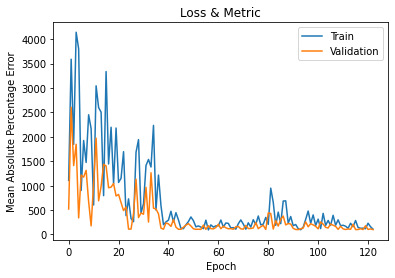

early stopping at 122 epoch.
val_mape: 99.84873962402344


In [82]:
#issue from previous test train model with 50 sequences of length 20
data_threshold_test, idx = load_preproc_data()
X_train, y_train, X_test, y_test, model_init = train_model(df = data_threshold_test, nb_sequences=50, len_=20, plot_history=True)

Prediction of stock return on J+1: [[0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]
 [0.00022306]] with mape 4558.888671875


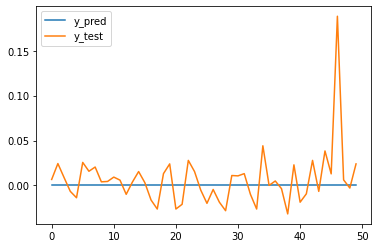

In [83]:
#---Prediction
res = model_init.evaluate(X_test, y_test, verbose=0)
y_pred = model_init.predict(X_test)
plt.plot(y_pred, label='y_pred') #'.'
plt.plot(y_test,  label='y_test')
plt.legend()

print(f"Prediction of stock return on J+1: {y_pred} with mape {res[1]}")

In [ ]:
# same grid test to confirm the choice
data_threshold_test, idx = load_preproc_data()
grid(data_threshold_test, start_len=10, stop_len=28, step_nbs=50, stop_nbs=70)

In [ ]:
# train our model with best nb_sequences and len_
data_threshold_test, idx = load_preproc_data()
X_train, y_train, X_test, y_test, model_1_ = train_model(df = data_threshold_test, train_threshold=0.8, val_threshold=0.9, nb_sequences=50, len_=20, plot_history=True)

In [ ]:
#---Prediction with best nb_sequences and len_
res = model_1_.evaluate(X_test, y_test, verbose=0)
y_pred = model_1_.predict(X_test)
plt.plot(y_pred, label='y_pred') #'.'
plt.plot(y_test,  label='y_test')
plt.legend()

print(f"Prediction of stock return on J+1: {y_pred} with mape {res[1]}")

## Train our model only on first 60%/70% of data to exclude 2020-2021 pandemic effect.

In [109]:
#---Take 70% of data to train our model
data, idx = load_preproc_data()
threshold_data = int(0.7*data.shape[0])
data_70 = data[:threshold_data].copy()

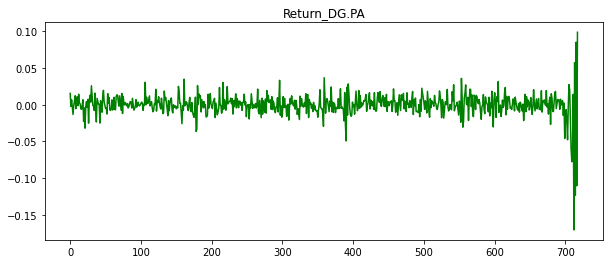

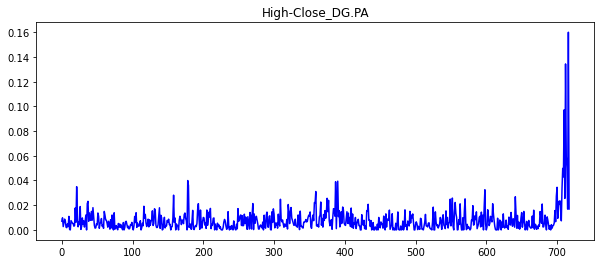

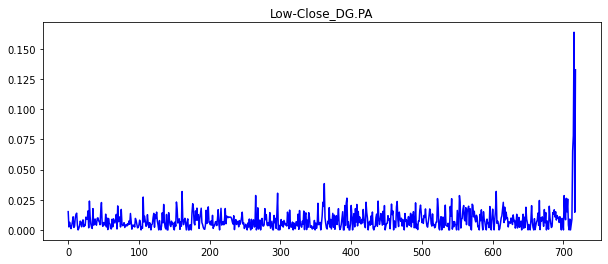

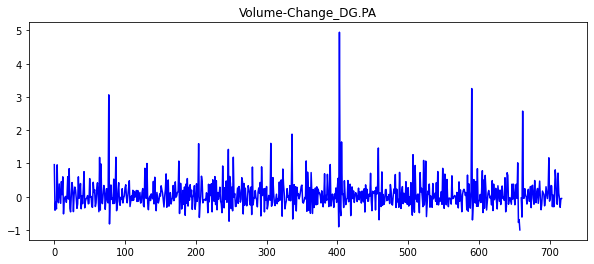

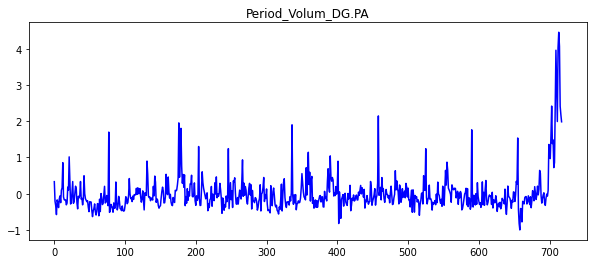

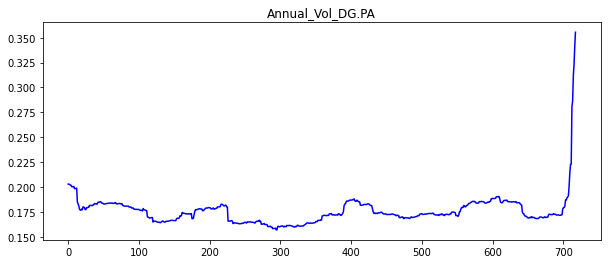

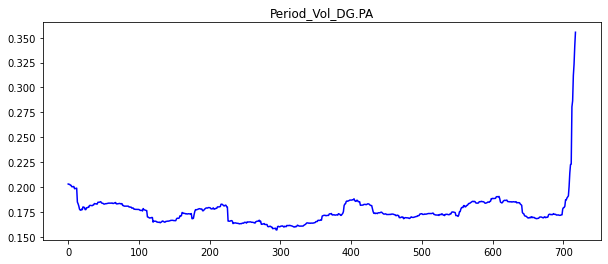

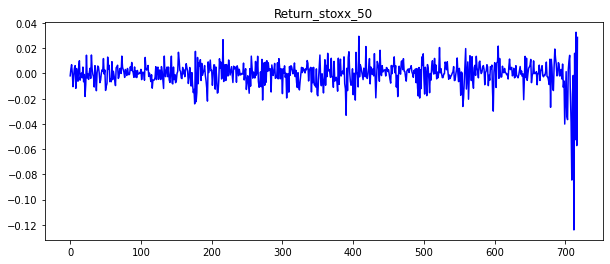

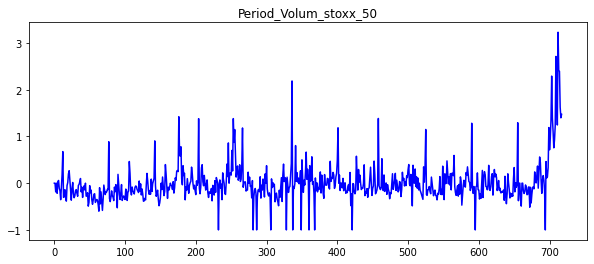

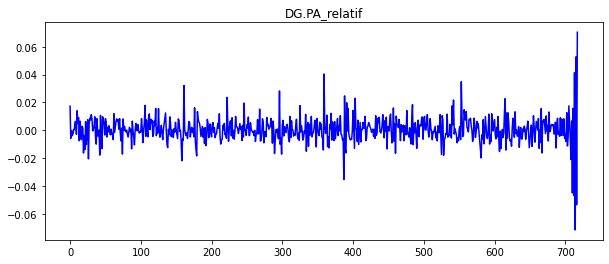

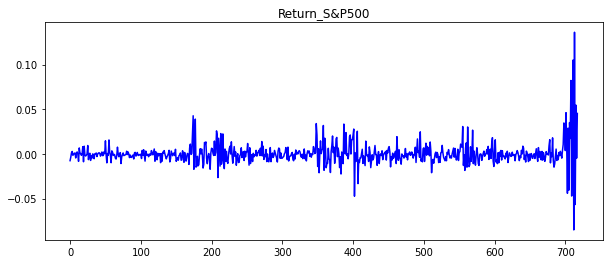

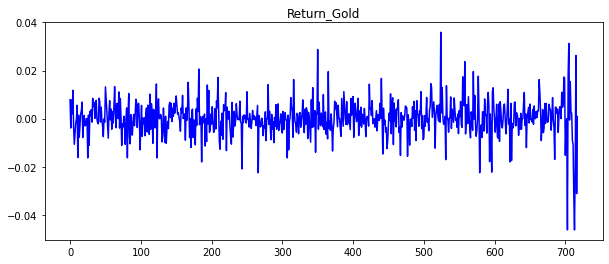

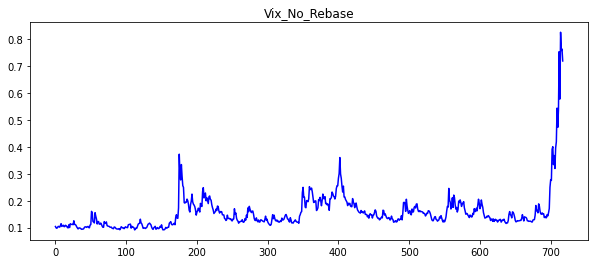

In [110]:
#---Plot the temporal progression of different features of our Data

%matplotlib inline

for col in data_70.columns:
    color="green" if col == "Return_DG.PA" else "blue"
    data_60[col].plot(figsize=(10, 4), color=color)
    plt.title(col)

    plt.show()

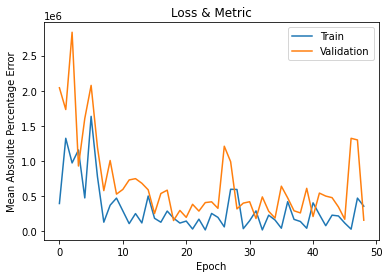

early stopping at 48 epoch.
val_mape: 150873.453125


In [111]:
#---Train model with 60% of data
X_train, y_train, X_test, y_test, model = train_model(data_70, momentum=0.9, loss='MAPE', plot_history=True)

**Worse than with the whole data !**

## Take first 60%

In [120]:
#---Take 60% of data to train our model
data, idx = load_preproc_data()
threshold_data = int(0.6*data.shape[0])
data_60 = data[:threshold_data].copy()

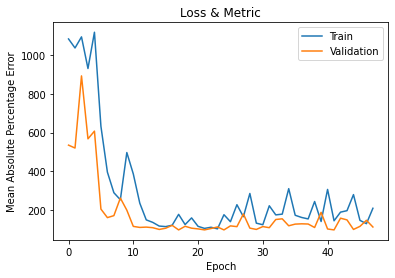

early stopping at 47 epoch.
val_mape: 96.82286071777344


In [121]:
X_train, y_train, X_test, y_test, model = train_model(data_60, plot_history=True)

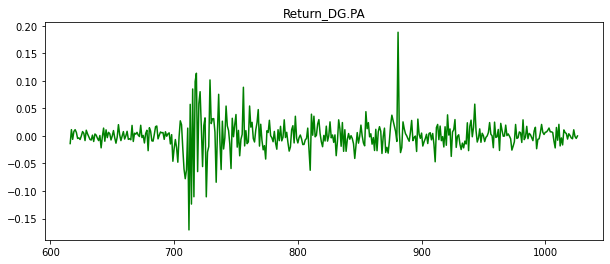

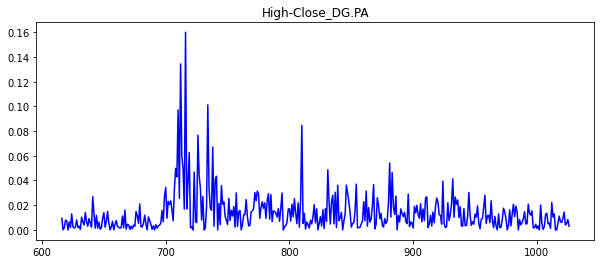

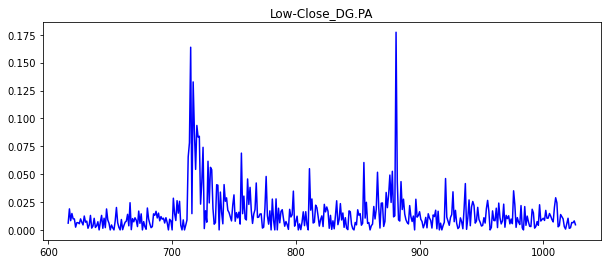

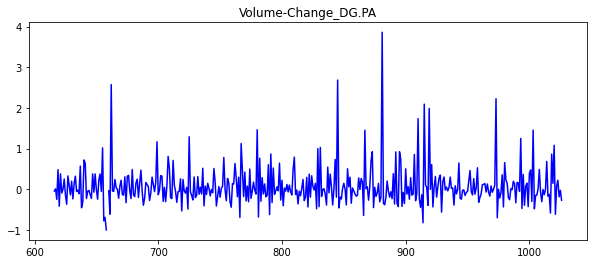

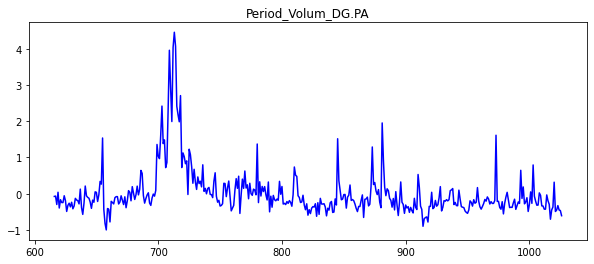

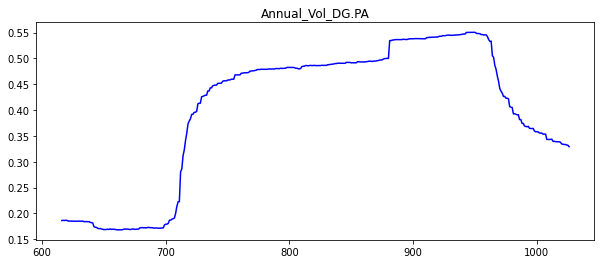

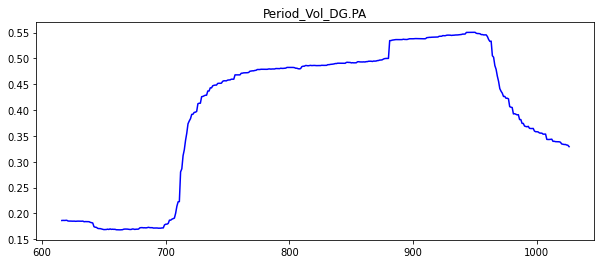

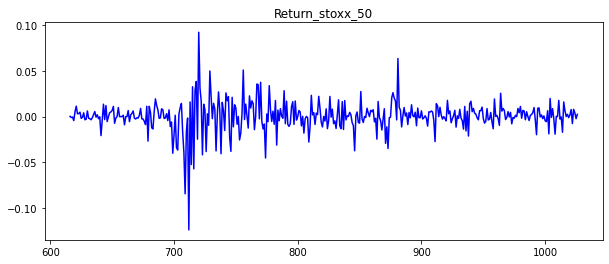

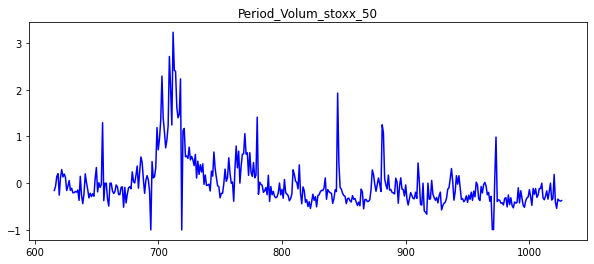

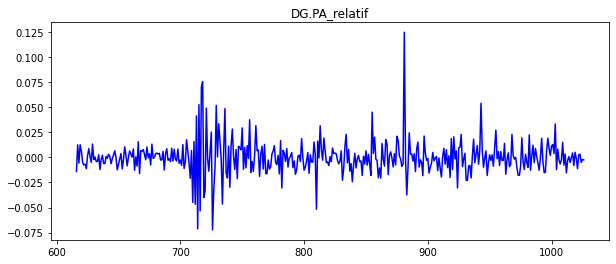

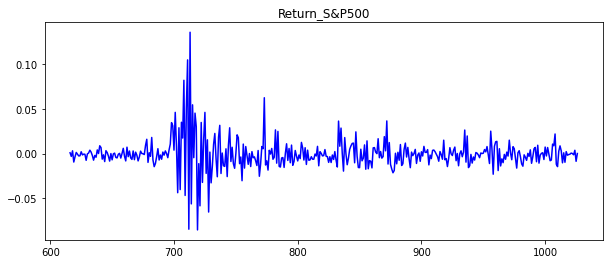

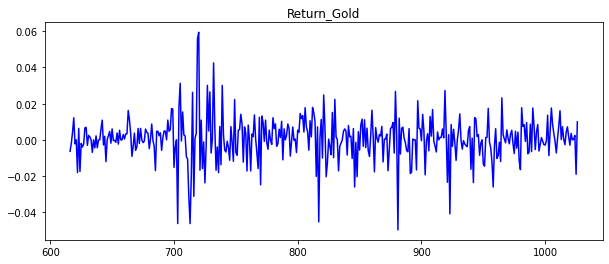

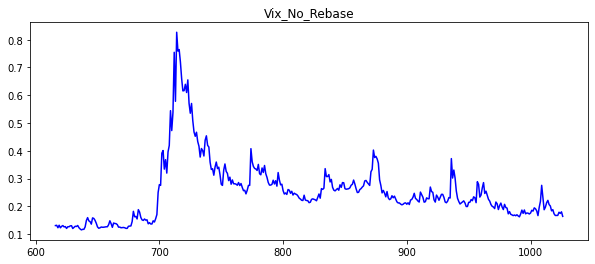

In [145]:
#---Plot the temporal progression of different features of our Data

%matplotlib inline

for col in data_last_40.columns:
    color="green" if col == "Return_DG.PA" else "blue"
    data_last_40[col].plot(figsize=(10, 4), color=color)
    plt.title(col)

    plt.show()

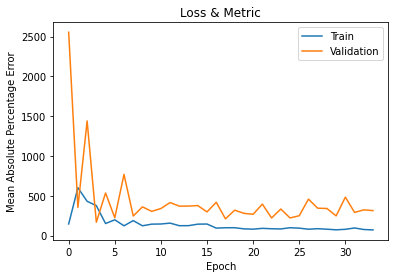

early stopping at 33 epoch.
val_mape: 167.86257934570312


In [167]:
X_train, y_train, X_test, y_test, model_last_40 = train_model(data_last_40, plot_history=True, len_=10, nb_sequences=30)

## Let's test last 60% of data

In [152]:
#---Take last 60% of data to train our model
data, idx = load_preproc_data()
threshold_data = int(0.4*data.shape[0])
data_last_60 = data[threshold_data:].copy()

In [154]:
data_last_60.shape

(617, 13)

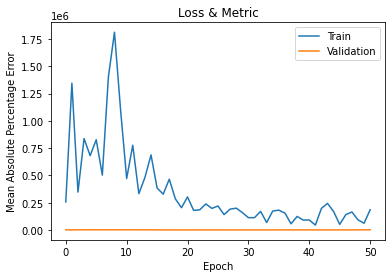

early stopping at 50 epoch.
val_mape: 414.07733154296875


In [170]:
X_train, y_train, X_test, y_test, model_last_60 = train_model(data_last_60, plot_history=True, len_=10, nb_sequences=20)

Prediction of stock return on J+1: [[ 0.00107636]
 [ 0.00241289]
 [ 0.00485312]
 [ 0.011389  ]
 [ 0.00422688]
 [-0.01681192]
 [-0.03052399]
 [-0.03357527]
 [-0.03107682]
 [-0.02503433]] with mape 545.5936279296875


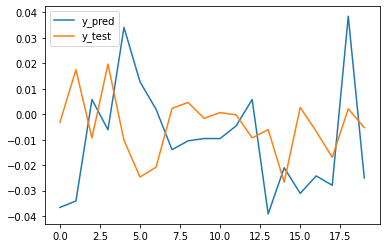

In [171]:
#---Prediction
res = model_last_60.evaluate(X_test, y_test, verbose=0)
y_pred = model_last_60.predict(X_test)
plt.plot(y_pred[:,-1,:], label='y_pred') #'.'
plt.plot(y_test,  label='y_test')
plt.legend()

print(f"Prediction of stock return on J+1: {y_pred[-1]} with mape {res[1]}")

**Finally MAPE is less than our benchmark 100%** => should we take this business decision and train our model on first 60% of data ?

## Best choice of data: first 60% without covid related data.

In [ ]:
#---Take 60% of data to train our model
data, idx = load_preproc_data()
threshold_data = int(0.6*data.shape[0])
data_60 = data[:threshold_data].copy()

In [ ]:
#---Plot the temporal progression of different features of our Data

%matplotlib inline

for col in data_last_40.columns:
    color="green" if col == "Return_DG.PA" else "blue"
    data_last_40[col].plot(figsize=(10, 4), color=color)
    plt.title(col)

    plt.show()

### Visualization of our choice:
- whole dataset
- first 70% with the beginning of covid
- last 40% with covid
- last 60% with and without covid
- cross validation based on Vix (relativité)
- first 60% without covid

<AxesSubplot:>

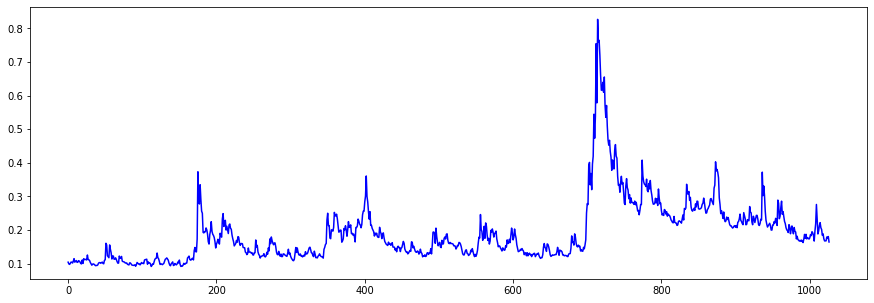

In [211]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_100, idx = load_preproc_data('vinci')
data_100['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')

<AxesSubplot:>

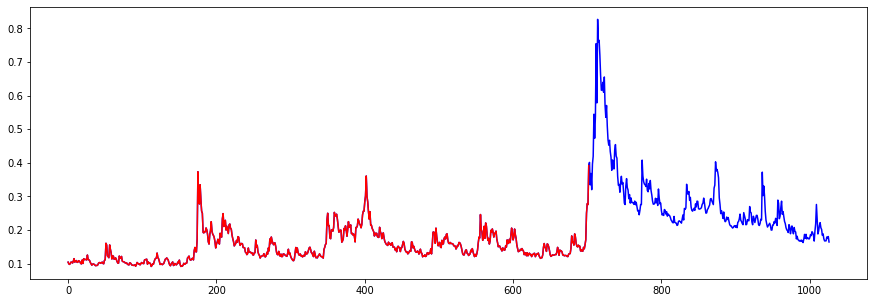

In [215]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_first_70, idx = load_preproc_data('vinci')

data_first_70_stop = int(0.685*data.shape[0])
data_first_70 = data[:data_first_70_stop].copy()

%matplotlib inline
data_100['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')
data_first_70['Vix_No_Rebase'].plot(figsize=(15,5), color='red')

<AxesSubplot:>

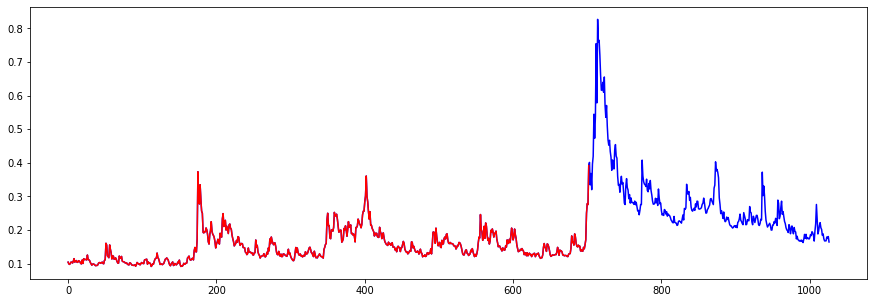

In [216]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_last_40, idx = load_preproc_data('vinci')

data_last_40_stop = int(0.4*data.shape[0])
data_last_40 = data[:data_last_40_stop].copy()

%matplotlib inline
data_100['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')
data_last_40['Vix_No_Rebase'].plot(figsize=(15,5), color='red')

In [208]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_last_60, idx = load_preproc_data('vinci')



In [ ]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_kfold, idx = load_preproc_data('vinci')

#---Fold_1
data_kfold_1_stop = int(0.17*data.shape[0])
data_kfold_1 = data[:data_kfold_1_stop].copy()

#---Fold_2
data_kfold_2_start = int(0.21*data.shape[0])
data_kfold_2_stop = int(0.345*data.shape[0])
data_kfold_2 = data[data_kfold_2_start:data_kfold_2_stop].copy()

#---Fold_3
data_kfold_3_start = int(0.425*data.shape[0])
data_kfold_3_stop = int(0.6885*data.shape[0])
data_kfold_3 = data[data_kfold_3_start:data_kfold_3_stop].copy()

#---Fold_4
data_kfold_4_start = int(0.77*data.shape[0])
data_kfold_4 = data[data_kfold_4_start:].copy()


#---Plot cross validation stationary parts
%matplotlib inline
data_kfold['Vix_No_Rebase'].plot(figsize=(15,5), color='blue')
data_kfold_1['Vix_No_Rebase'].plot(figsize=(15,5), color='orange')
data_kfold_2['Vix_No_Rebase'].plot(figsize=(15,5), color='violet')
data_kfold_3['Vix_No_Rebase'].plot(figsize=(15,5), color='red')
data_kfold_4['Vix_No_Rebase'].plot(figsize=(15,5), color='green')

In [209]:
#---Create slices based on 'Vix_no_rebase' (relativité) to train our model on.
data_first_60, idx = load_preproc_data('vinci')



In [ ]:
#---Pipeline
def train_model(df,
                train_threshold=0.6,
                val_threshold=0.8,
                nb_sequences = 100,
                len_ = 20,
                l_rate = 0.001,
                momentum = 0.9,
                loss = 'MAPE',
                metric = MAPE,
                patience = 30,
                batch_size = 32,
                horizon=1,
                plot_history=False):
    
    """Train model function:
    Allows to split sequences and gets X and y for train, val, test sets;
    Initializes stacked RNN model with Normalization, LSTM and 2 fully connected layers.
    Returns: X_train, y_train, X_test, y_test, model"""
    

    #---Split train, test, val sets
    df_train, df_val, df_test = train_test_val_split(df, train_threshold=train_threshold, val_threshold=val_threshold)
    
    #---Get train, test, val X and y sequences
    X_train, y_train = get_X_y(df_train, length=len_, number_of_sequences=nb_sequences)
    X_val, y_val = get_X_y(df_val, length=len_, number_of_sequences=nb_sequences) #round(nb_sequences*0.2)
    X_test, y_test = get_X_y(df_test, length=len_, number_of_sequences=nb_sequences) #round(nb_sequences*0.2)
    
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    #---Initialize the model
    model = Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(50, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(30, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(20, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    
    model.compile(loss=loss, 
                  optimizer=RMSprop(learning_rate=l_rate, momentum=momentum), 
                  metrics=[metric])


    es = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=1000, 
            batch_size=batch_size,
            callbacks=[es],
            verbose=0)

    
    if plot_history:
        
        plot_loss(history, patience)
        
#     res = model.evaluate(X_test, y_test, verbose=0)
#     return res[1]
    return X_train, y_train, X_test, y_test, model

## Test length of sequnces and number sequnces

In [203]:
#---Test 1: nb_sequences

def test_nb_sequences(df, start=50, stop=100, step=10):
    
    """This function computes MAPE in given range
    to find best nb_sequences"""
    
    nb_sequences_grid = np.arange(start, stop, step)
    MAPE = []

    for nb_sequences in nb_sequences_grid:
            X_train, y_train, X_test, y_test, model = train_model(df=df, nb_sequences=nb_sequences)
            res = model.evaluate(X_test, y_test)
            MAPE.append((nb_sequences, res[1]))
            print(f"For {nb_sequences} sequences the MAPE is of {res[1]:.2f} %")

In [157]:
test_nb_sequences(data_60, start=50, stop=200, step=10)

2/2 [==============================] - 0s 22ms/step - loss: 117.5609 - mean_absolute_percentage_error: 117.5609
For 50 sequences the MAPE is of 117.56 %


KeyboardInterrupt: 

In [ ]:
#---Test 2: length of sequence

def test_len_sequence(df, start=10, stop=30, step=5):
    
    """This function computes MAPE in given range
    to find best nb_sequences"""
    
    len_grid = np.arange(start, stop, step)
    MAPE = []

    for len_ in len_grid:
            res = train_model(df, len_=len_)
            MAPE.append((len_, round(res[1])))
            print(f"For lenght of sequence {len_} the MAPE is of {res[1]:.2f} %")

In [ ]:
#---Test nb_sequences and len_
def grid(df, start_len = 10,stop_len = 30, step_len = 5,
            start_nbs = 270, stop_nbs = 330, step_nbs=10):
    
    """This function computes MAPE in given range
    to find best nb_sequences AND the optimal lenght of sequences."""
    
    len_grid = np.arange(start_len,stop_len, step_len)
    nb_sequences_grid = np.arange(start_nbs,stop_nbs, step_nbs)
    MAPE = []

    for len in len_grid:
        for nb_sequences in nb_sequences_grid:
            res = train_model(df, nb_sequences=100)
            MAPE.append((nb_sequences, len_, res[1]))

            print(f"For {nb_sequences} sequences of lenght {len_} each, the MAPE is of {res[1]:.2f} %")